# Setup

### Base setup

$$
\begin{align}
Y &\sim \mathrm{Unif}(\{\pm1\}) \\
X | Y &\sim \mathcal{N}(Y \cdot \mu, \Sigma),
\end{align}
$$

where $\Sigma \in \mathbb{R}^{d \times d}$ is positive definite.
An adversary can perturb $X$ by any $\delta$ such that
$\|\delta\|_2 \leq \epsilon$.

### Transformed setup

This above base setup is actually equivalent to the following setup:

$$
\begin{align}
Y &\sim \mathrm{Unif}(\{\pm1\}) \\
\tilde{X} | Y &\sim \mathcal{N}(Y \cdot \tilde\mu, I_d),
\end{align}
$$

where $\tilde{X} = \Sigma^{-1/2} X$ and $\tilde \mu = \Sigma^{-1/2} \mu$.
An adversary can perturb $\tilde X$ by any $\tilde\delta$ such that

$$\|\tilde\delta\|_\Sigma \triangleq \sqrt{\tilde\delta^\top \Sigma \tilde\delta} \leq \epsilon.$$


# Linear classifiers

We study linear classifiers of the form $f_{v,b}(\tilde x) = \mathrm{sgn}(v^\top \tilde x + b)$.

### Natural error

Carrying over the analysis of the identity covariance case, we have

$$
L^\text{nat-err}(f_{v,b})
=
\frac{1}{2} Q\left( \frac{v^\top \tilde\mu - b}{\|v\|_2} \right)
+ \frac{1}{2} Q\left( \frac{v^\top \tilde\mu + b}{\|v\|_2} \right).
$$

### Robust error
First note that

$$
\max_{\|\tilde\delta\|_\Sigma \leq \epsilon}
v^\top \tilde\delta
= \epsilon \cdot \|v\|_{\Sigma^{-1}}.
$$

This follows from the fact that
$\|\cdot\|_{\Sigma}$ and $\|\cdot\|_{\Sigma^{-1}}$
are [dual to one another](https://math.stackexchange.com/a/3288308/85418).

Thus

$$
L^\text{rob-err}_{\epsilon}(f_{v,b})
=
\frac{1}{2} Q\left( \frac{v^\top \tilde\mu - b - \epsilon \cdot \|v\|_{\Sigma^{-1}}}{\|v\|_2} \right)
+ \frac{1}{2} Q\left( \frac{v^\top \tilde\mu + b - \|v\|_{\Sigma^{-1}}}{\|v\|_2} \right).
$$


### Achievable region

For the alignment plot between natural loss and robust loss,
the achievable region is goverend by the set

$$
\mathcal{S}
= \left\{
\left(
\frac{w^\top \tilde\mu}{\|\tilde\mu\|_2},
\|w\|_{\Sigma^{-1}}
\right)
\,
\Bigg\vert
\,
\|w\|=1
\right\} \subseteq [-1, 1] \times \mathbb{R}.
$$

There exists a $f_{v,0}$ such that

$$
\left(
L^\text{nat-err}(f_{v,0}),
L^\text{rob-err}(f_{v,0})
\right)
= (\ell_{\mathrm{nat}}, \ell_{\mathrm{rob}})
$$

iff and only if

$$
\left(
Q^{-1}(\ell_{\mathrm{nat}} \cdot \|\tilde\mu\|_2),
Q^{-1}(\ell_{\mathrm{nat}} - \ell_{\mathrm{rob}})
\right) \in \mathcal{S}.
$$

**Properties of $\mathcal{S}$**

1. $\mathcal{S}$ is compact.
   - Proof:
     $\mathcal{S}$ is the image of $\mathbb{S}^{d - 1} \subseteq \mathbb{R}^d$
     under a continuous map $s: \mathbb{R}^d \to \mathbb{R}^2$.
     Since $\mathbb{S}^{d - 1}$ is compact, $\mathcal{S}$ is compact.
      

2. The projection of $\mathcal{S}$ onto the first coordinate is $[-1, 1]$.
   - Proof:
     The endpoints $\{\pm1\}$ are achieved by
     $w = \pm \frac{\tilde\mu}{\|\tilde\mu\|_2}$.
     Since $\mathcal{S}$ is path-connected,
     it's projection onto the first coordinate is also path connected.
     Thus $(-1, 1)$ are also in the projection.
      
   
3. Let $S_\alpha$ denote the subset of $\mathcal{S}$
   with first coordinate equal to $\alpha$.
   Then $S_\alpha = \{\alpha\} \times [r_{-}(\alpha), r_{+}(\alpha)]$
   for some continuous functions $r_{-}, r_{+}: [-1, 1] \to \mathbb{R}$.
   - Proof:
       Let
       $$
           \mathbb{S}^{d - 1}_\alpha \triangleq
           \mathbb{S}^{d - 1}
           \cap \{
               w \in \mathbb{w}^d
               \vert w^\top \tilde\mu = \alpha \|\tilde\mu\|_2
           \}.
       $$
       
       Then $S_\alpha = s(\mathbb{S}^{d - 1}_\alpha)$.
       Since $s$ is continuous $\mathbb{S}^{d - 1}_\alpha$
       is compact and path connected,
       $S_\alpha$ is compact and path connected.
       Thus $S_\alpha = \{\alpha\} \times [r_{-}(\alpha), r_{+}(\alpha)]$
       for some not necessarily continuous functions
       $r_{-}, r_{+}: [-1, 1] \to \mathbb{R}$.
       
       It remains to show that $r_{-}$ and $r_{+}$ are continuous.
       This follows from the uniform continuity of
       $s$ on $\mathbb{S}^{d - 1}$,
       which holds since $\mathbb{S}^{d - 1}$ is compact.
       
Thus $\mathcal{S}$ is completely characterized by $r_{-}$ and $r_{+}$.

**Characterizing $r_-$ and $r_+$**

$r_-$ and $r_+$ are the solutions to the optimization problems
$$
\underset{w \,\in\, S_\alpha}{\min / \max}
\,\,
\|w\|_{\Sigma^{-1}}.
$$

Since $s$ is differentiable on $\mathbb{R}^{d} - \{0\}$,
we can apply the method of Lagrange multipliers to characterize
$r_-$ and $r_+$.

Doing so tells us that
$$
\{
(\alpha, r_-(\alpha)) \vert \alpha \in [-1, 1]
\}
\cup
\{
(\alpha, r_+(\alpha)) \vert \alpha \in [-1, 1]
\}
\\
=s\left(
\{ w \in \mathbb{S}^{d-1}\vert
(\Sigma^{-1} + \lambda) w \propto \tilde\mu,
\lambda \in \mathbb{R}
\}
\cup \{\pm \tilde\mu / \|\tilde\mu\|_2 \}
\right),
$$

where $\sigma(\Sigma^{-1})$ is the spectrum of $\Sigma^{-1}$
and $\mathrm{eigvs}(\Sigma)$ is the set of all eigenvectors of $\Sigma$.

The above equation is easier to work with
when we assume $\tilde \mu$ is not
orthogonal to any components of $\Sigma$.

### Experimental evidence

Let $\sigma(\Sigma) = \{\sigma_1, \ldots, \sigma_d\}$,
with $\sigma_1 \geq \sigma_2 \geq \cdots \geq \sigma_d > 0$
and corresponding (normalized) eigenvectors $z_1, \ldots, z_d$.

It seems experimentally that

$$
\{
(\alpha, r_-(\alpha)) \vert \alpha \in [-1, 1]
\}
\cup
\{
(\alpha, r_+(\alpha)) \vert \alpha \in [-1, 1]
\}
\\
=s\left(
\{ w \in \mathbb{S}^{d-1}\vert
w \propto
(\Sigma^{-1} + \lambda)^{-1} \tilde\mu,
\lambda \in
(-\infty, -\sigma_{d-1}^{-1})
\sqcup
(-\sigma_2^{-1}, \infty)
- \{-\sigma_1^{-1}, -\sigma_d^{-1} \}
\}
\cup
(\{\pm z_1, \pm z_2, \pm z_{d-1}, \pm z_d, \pm \tilde\mu / \|\tilde\mu\|_2\}
\cap \mathbb{S}^{d-1})
\right),
$$

# Begin Computational exploration

WLOG we will take $\Sigma$ to be diagonal.
A lot of the above derivations are stale.
See the overleaf for the most up to date version.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from tqdm.notebook import tqdm

In [2]:
def Q(x):
    return 1 - scipy.stats.norm.cdf(x)

def natErr(v, mu, sigma_diag):
    return Q(v @ mu / np.sqrt((v * v) @ sigma_diag))

def robErr(v, mu, sigma_diag):
    return Q((v @ mu - np.sqrt((v * v).sum(axis=-1))) / np.sqrt((v * v) @ sigma_diag))

def natRobErrs(v, mu, sigma_diag):
    print(robErr(v=v, mu=mu, sigma_diag=sigma_diag).shape)
    return np.stack((
        natErr(v=v, mu=mu, sigma_diag=sigma_diag),
        robErr(v=v, mu=mu, sigma_diag=sigma_diag)
    ), axis=-1)

natRobErrs(v=np.arange(15).reshape(3, 5), mu=np.arange(5) + 1, sigma_diag=1 + np.arange(5))

(3,)


array([[2.25547674e-04, 1.23151127e-03],
       [6.59913113e-05, 4.97545215e-04],
       [5.80201904e-05, 4.72775462e-04]])

### In Q^{-1} space

In [3]:
def sigmoidspace(lo, hi, n, scale=1):
    """https://stackoverflow.com/a/57104178/1337463"""
    raw = np.tanh(np.linspace(-scale, scale, n))
    raw_01 = (raw - raw[0]) / (raw[-1] - raw[0]) 
    return lo + (hi - lo) * raw_01

def s_func(mu, sigma_diag, ws):
    xs = (ws @ mu) / np.sqrt((ws * ws) @ sigma_diag)
    ys = np.sqrt((ws * ws).sum(axis=-1)) / np.sqrt((ws * ws) @ sigma_diag)
    return np.stack((xs, ys), axis=0)

def w_lam_rob(mu, sigma_diag, attack_eps):
    lam_lo = -1 / sigma_diag.max()
    lam_hi = 1e9
    for i in range(64):
        lam_mid = (lam_lo + lam_hi) / 2
        
        w_mid = mu / (1 + lam_mid * sigma_diag)
        if np.sqrt(w_mid @ w_mid) < attack_eps:
            lam_hi = lam_mid
        else:
            lam_lo = lam_mid
    
    return mu / (1 + lam_lo * sigma_diag), lam_lo

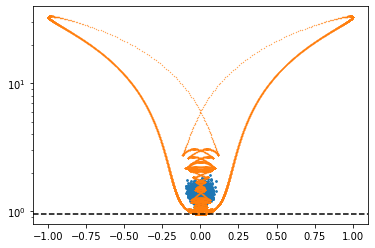

In [4]:
def plot(D, seed):
    np.random.seed(seed)
    D = D

    SLO = 1e-3
    SHI=10
    #Sigma = 1 + np.arange(D)
    Sigma = np.sort(np.log(1 + np.abs(np.random.normal(size=D))))
    #Sigma = np.sort(np.concatenate(([SLO, SHI], SLO + (SHI-SLO)*np.random.random(size=D-2))))
    mu = np.random.normal(size=D)
    #mu = normalize(mu)
    mu /= np.sqrt((mu / Sigma) @ mu)

    EPS = 1e-9
    MX = 100 * 1 / Sigma[0]
    NUM_FRONT = D
    NUM_BACK = 0
    lambdas = np.concatenate([
        sigmoidspace(lo=-MX, hi=-1/Sigma[0] - EPS, n=1000, scale=10),
        sigmoidspace(lo=-1/Sigma[-1] + EPS, hi=MX, n=10000, scale=10),
    ] + [
        sigmoidspace(lo=-1/z1 + EPS, hi=-1/z2 - EPS, n=1000, scale=10)
        for z1, z2 in zip(Sigma[:NUM_FRONT], Sigma[1:1+NUM_FRONT])
    ] + ([] if NUM_BACK == 0 else [
        sigmoidspace(lo=-1/z1 + EPS, hi=-1/z2 - EPS, n=1000, scale=10)
        for z1, z2 in zip(Sigma[-NUM_BACK-1:], Sigma[-NUM_BACK:])
    ]))

    ws = 1 / (1 + lambdas[:, np.newaxis] * Sigma[np.newaxis, :]) * mu[np.newaxis, :]
    #1 / (1 / Sigma[np.newaxis, :] + lambdas[:, np.newaxis]) * mu[np.newaxis, :]
    ws = np.concatenate([ws, -ws])
    ws_random = np.random.normal(size=(10000, D))
    
    rs = s_func(mu=mu, sigma_diag=Sigma, ws=ws)
    rs_random = s_func(mu=mu, sigma_diag=Sigma, ws=ws_random)

    plt.scatter(rs_random[0], rs_random[1], s=3)
    plt.scatter(rs[0], rs[1], s=0.1)
    plt.yscale("log")
    plt.axhline(np.sqrt(1/Sigma[-1]), linestyle="--", color="black")    
    
plot(D=32, seed=19)

### In Q space

15.293550117753636


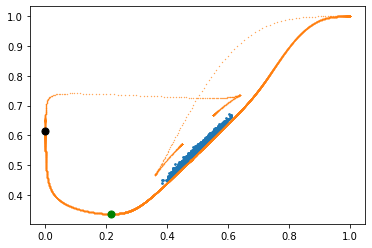

In [9]:
def plot2(D, mu_scale, attack_eps, seed):
    np.random.seed(seed)
    D = D

    SLO = 1e-3
    SHI=10
    #Sigma = 1 + np.arange(D)
    Sigma = np.sort(np.log(1 + np.abs(np.random.normal(size=D))))
    #Sigma = np.sort(np.concatenate(([SLO, SHI], SLO + (SHI-SLO)*np.random.random(size=D-2))))
    
    mu = np.random.normal(size=D)
    mu /= np.sqrt((mu / Sigma) @ mu)
    mu *= mu_scale
    
    EPS = 1e-9
    MX = 100 * 1 / Sigma[0]
    NUM_FRONT = 1
    NUM_BACK = 1
    lambdas = np.concatenate([
        sigmoidspace(lo=-MX, hi=-1/Sigma[0] - EPS, n=1000, scale=10),
        sigmoidspace(lo=-1/Sigma[-1] + EPS, hi=MX, n=10000, scale=10),
    ] + [
        sigmoidspace(lo=-1/z1 + EPS, hi=-1/z2 - EPS, n=1000, scale=10)
        for z1, z2 in zip(Sigma[:NUM_FRONT], Sigma[1:1+NUM_FRONT])
    ] + ([] if NUM_BACK == 0 else [
        sigmoidspace(lo=-1/z1 + EPS, hi=-1/z2 - EPS, n=1000, scale=10)
        for z1, z2 in zip(Sigma[-NUM_BACK-1:], Sigma[-NUM_BACK:])
    ]))

    ws = 1 / (1 + lambdas[:, np.newaxis] * Sigma[np.newaxis, :]) * mu[np.newaxis, :]
    ws = np.concatenate([ws, -ws])
    ws_random = np.random.normal(size=(10000, D))
    
    w_rob, lam_rob = w_lam_rob(mu=mu, sigma_diag=Sigma, attack_eps=attack_eps)
    print(lam_rob)

    rs = s_func(mu=mu, sigma_diag=Sigma, ws=ws)
    rs_random = s_func(mu=mu, sigma_diag=Sigma, ws=ws_random)
    
    r_rob = s_func(mu=mu, sigma_diag=Sigma, ws=w_rob)
    r_nat = s_func(mu=mu, sigma_diag=Sigma, ws=mu / Sigma)
    
    plt.scatter(Q(rs_random[0]), Q(rs_random[0] - attack_eps*rs_random[1]), s=3)
    plt.scatter(Q(rs[0]), Q(rs[0] - attack_eps*rs[1]), s=0.1)
    
    plt.scatter(Q(r_rob[0]), Q(r_rob[0] - attack_eps * r_rob[1]), s=50, color="green")
    plt.scatter(Q(r_nat[0]), Q(r_nat[0] - attack_eps * r_nat[1]), s=50, color="black")
    
    #plt.yscale("log")
    #plt.xscale("log")
    
# Cool seeds: 19
plot2(D=32, mu_scale=3, attack_eps=0.1, seed=19)